###### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2025 sem 1

## Week 4 Tutorial

After working through this tutorial you should know

- how to convert between discrete and continuous data
- how to classify data using Naive Bayes
- how and why to implement smoothing in Naive Bayes

## Discrete and continuous data

Consider the following dataset:

| ID | Color | Weight (g) |
| -- | ----- | ---------- |
| 1  | Red   | 1021.2     |
| 2  | Red   | 1027.0     |
| 3  | Red   | 1012.5     |
| 4  | Blue  | 1010.4     |
| 5  | Blue  | 1019.5     |
| 6  | Gold  | 1016.4     |
| 7  | Gold  |  995.4     |
| 8  | Gold  | 1012.8     |

### Q1
Which attribute is discrete and which is continuous?

Weight is continuous
Color is discrete

### Q2
Discretise the continuous attribute into 2 bins using the (unsupervised) methods of **equal
width**, **equal frequency**, and **k-means** (break ties where necessary).

In [197]:
# Equal width
# Range: 1027.0 - 995.4 = 31.6
# If exactly half
# Bin 1: [995.4, 1011.2)
# Bin 2: [1011.2 - 1027]
# Rounded
# Bin 1: 995 - 1011
# Bin 2: 1012 - 1027

In [198]:
# Equal frequency
# Sorted: 995.4 1010.4 1012.5 1012.8 1016.4 1019.5 1021.2 1027.0
# Bin 1: [995.4,1012.8)
# Bin 2: [1012.9,1027.0]

K-means manually
1. Randomly initialise n cluster centroids
- Let 2 initial seesd be ID 3 and 4

2. Iteratively assign each data point to the nearest centroid

3. Update centroids as the mean of assigned points until convergence

[1 0 0 0 0 0 0 0]
[[1017.11428571]
 [ 995.4       ]]


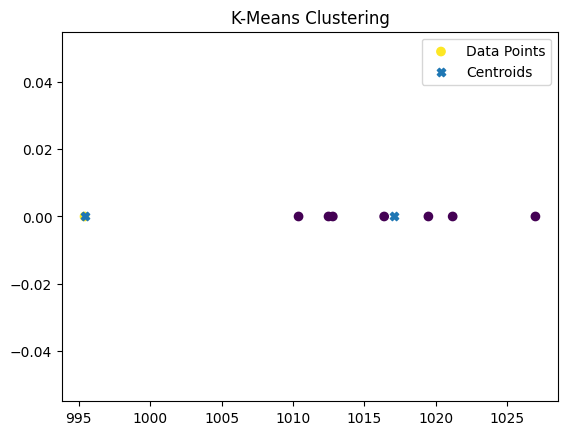

In [199]:
# K-means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
K = 2
x = np.array([995.4, 1010.4, 1012.5, 1012.8, 1016.4, 1019.5, 1021.2, 1027.0]).reshape(-1,1)
kmeans = KMeans(n_clusters=K, random_state=1)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(labels)
print(centroids)
plt.scatter(x, np.zeros_like(x), c=labels, label="Data Points")  # Plot points
plt.scatter(centroids, np.zeros_like(centroids), marker='X', label="Centroids")  # Plot centroids
plt.legend()
plt.title("K-Means Clustering")
plt.show()

### Q3
How could the discrete variable be converted to a continuous numeric variable?

In [200]:
# One hot encoding
red = [1,1,1,0,0,0,0,0]
blue = [0,0,0,1,1,0,0,0]
gold = [0,0,0,0,0,1,1,1]

## Naive Bayes (theory)

Given the following dataset, build a Naive Bayes model to predict the label "Play."

| ID | Outlook | Temp | Humid | Wind | Play |
| -- | ------- | ---- | ----- | ---- | ---- |
| A  | S       | H    | N     | F    | N    |
| B  | S       | H    | H     | T    | N    |
| C  | O       | H    | H     | F    | Y    |
| D  | R       | M    | H     | F    | Y    |
| E  | R       | C    | N     | F    | Y    |
| F  | R       | C    | N     | T    | N    |

Use the model to classify these test instances (? represents missing value):

| ID | Outlook | Temp | Humid | Wind | Play |
| -- | ------- | ---- | ----- | ---- | ---- |
| G  | O       | M    | N     | T    | ?    |
| H  | ?       | H    | ?     | F    | ?    |

### Q4
Classify the test instances using:
1. no smoothing
2. epsilon smoothing
3. Laplace smoothing ($\alpha = 1$)

ID = G

1. No smoothing
- P(play=Y) = 3/6 = 1/2
- P(play=N) = 3/6 = 1/2

- P(Play = Y | T = [O,M,N,T]) = P(Play = Y) * P(O|Y) * P(M|Y) * P(N|Y) * P(T|Y) = 0.5 * 1/3 * 1/3 * 1/3 * 0/3 = 0
- P(Play = N | T = [O,M,N,T]) = P(Play = N) * P(O|N) * P(M|N) * P(N|N) * P(T|N) = 0.5 * 0/3 * 0/3 * 2/3 * 2/3 = 0

So no prediction

2. Epsiolon smoothing
- P(Play = Y | T = [O,M,N,T]) = P(Play = Y) * P(O|Y) * P(M|Y) * P(N|Y) * P(T|Y) = 0.5 * 1/3 * 1/3 * 1/3 * e = e/54
- P(Play = N | T = [O,M,N,T]) = P(Play = N) * P(O|N) * P(M|N) * P(N|N) * P(T|N) = 0.5 * e * e * 2/3 * 2/3 = 2e^2/9

2e^2/9 = e/54 * 12e,

If 12e>1, choose N, if 12e<1, choose Y, in practice e is very very small, so choose Yes.

Classify as Yes, due to fewer epsilons

3. Laplace smoothing ($\alpha = 1$)

- Outlook and temp has 3 possible values, humid and wind has 2

- P(Play = Y | T = [O,M,N,T]) = P(Play = Y) * P(O|Y) * P(M|Y) * P(N|Y) * P(T|Y) = 0.5 * 1+1/3+3 * 1+1/3+3 * 1+1/3+2 * 0+1/3+2 = 0.5 * 1/3 * 1/3 * 2/5 * 1/5 = 2/450 = 1/225
- P(Play = N | T = [O,M,N,T]) = P(Play = N) * P(O|N) * P(M|N) * P(N|N) * P(T|N) = 0.5 * 0+1/3+3 * 0+1/3+3 * 2+1/3+2 * 2+1/3+2 = 0.5 * 1/6 * 1/6 * 3/5 * 3/5 = 9/1800 = 1/200

Classify as Yes

## Naive Bayes (code)

Now let's implement a Naive Bayes model in Python.

The dataset that you are using this week consist of a dataset with 108 bridges. We use a modified version of the publicly available <a href="https://archive.ics.uci.edu/ml/datasets/Pittsburgh+Bridges"> Pittsburgh Bridges Data Set</a>. (click the link for more information on all features and values).

Each bridge is defined by 11 features and 1 label. These features are `River`, `Erected`, `Purpose`, `Length`, `Lanes`, `Clear`, `T-OR-D`, `Material`, `Span` and `Rel-L`. </br> The labels of these bridges are `ARCH`, `CANTILEV`, `CONT-T`, `NIL`, `SIMPLE-T`, `SUSPEN` and `WOOD`.

In [201]:
import random
import numpy as np
import pandas as pd

from pprint import pprint

The first step is to read the dataset into a dataframe.

In [202]:
# read the input file
df = pd.read_csv("bridges.csv")

print(df.head())

  River Erected   Purpose  Length  Lanes Clear   T-OR-D Material    Span  \
0     M  CRAFTS   HIGHWAY  MEDIUM      2     N  THROUGH     WOOD   SHORT   
1     A  CRAFTS  AQUEDUCT  MEDIUM      1     N     DECK     WOOD  MEDIUM   
2     O  MODERN   HIGHWAY  MEDIUM      2     G  THROUGH    STEEL  MEDIUM   
3     O  MATURE   HIGHWAY  MEDIUM      2     G  THROUGH    STEEL    LONG   
4     O  MODERN   HIGHWAY  MEDIUM      2     G  THROUGH    STEEL    LONG   

  Rel-L     Label  
0     S      WOOD  
1     S      WOOD  
2     F      ARCH  
3   S-F  CANTILEV  
4     F    CONT-T  


The we want to split the data to Train and Test. Let's assign the fisrt 85 instances for training and the last 23 instances for testing.

In [203]:
train_df = df[:85]
test_df = df[85:]
assert(len(train_df)==85)
assert(len(test_df)==23)

### Q5
Write a piece of code to calculate the probability of having the label 'WOOD' in the whole dataset.

In [204]:
prob_wood = len(df[df["Label"] == "WOOD"])/len(df)
prob_wood_1 = (df["Label"] == "WOOD").mean()
print(prob_wood_1)
prob_wood

0.14814814814814814


0.14814814814814814

### Prior probabilities

As introduced in the lectures, for builing the NB model, we need to calculte some probabilities. 

The first set of probabilities we need is the Prior probabilities. These show the current distribution of label values in the training set. In our specific case, we need to calculate the probability of all the labels (ARCH, CANTILEV, CONT-T, NIL, SIMPLE-T, SUSPEN, and WOOD) in the given dataset.

### Q6
Complete the following function to calculate the prior probabilities for our dataset.

In [205]:
# Probability of all the labels
def calc_prior(data):
    prior_prob = {}

    labels = data['Label']
    unique_labels, counts = np.unique(labels, return_counts=True)
    n = counts.sum()

    for i in range(len(unique_labels)):
        # prior_prob[unique_labels[i]] = ...
        prior_prob[unique_labels[i]] = float(counts[i]/n)

    return prior_prob

print(calc_prior(train_df))

{'ARCH': 0.11764705882352941, 'CANTILEV': 0.10588235294117647, 'CONT-T': 0.047058823529411764, 'NIL': 0.011764705882352941, 'SIMPLE-T': 0.4235294117647059, 'SUSPEN': 0.10588235294117647, 'WOOD': 0.18823529411764706}


### Likelihoods
The next set of probabilities we need to calculate are the conditional probabilities. We need to know the likelihood of each feature value given a specific label. We need a 3-dimensional dataset to store all the required conditional probabilities. The dataset should contain all the features (1st dimension), all their possible values (2nd dimension), and the conditional probability of each feature value given a specific label (3rd dimension).

### Q7
Complete the following function to calculate the likelihoods for our dataset.

In [206]:
EPSILON = 0.001

In [207]:
def calc_likelihood(data):
    # Create an empty dictionary to store the likelihoods
    likelihood = {}
    features_list = data.columns[:-1]
    unique_labels = np.unique(data.values[:, -1])

    for feature in features_list:
        feature_values = np.unique(data[feature])
        
        # Create a nested dictionary for each feature
        likelihood[feature] = {}

        for label in unique_labels:

            # Create a nested dictionary for each label
            likelihood[feature][label] = {}

            for value in feature_values:
                count = len(data[(data[feature] == value) & (data['Label'] == label)]) 
                total_count = len(data[data['Label'] == label]) 
                if count==0:
                    count = EPSILON

                likelihood[feature][label][value] = count / total_count
                print(f"Likelihood of {feature}={value} given label {label} is {likelihood[feature][label][value]:.4f}")
    return likelihood

likelihood = calc_likelihood(df)

Likelihood of River=A given label ARCH is 0.4000
Likelihood of River=M given label ARCH is 0.3333
Likelihood of River=O given label ARCH is 0.2667
Likelihood of River=A given label CANTILEV is 0.1818
Likelihood of River=M given label CANTILEV is 0.4545
Likelihood of River=O given label CANTILEV is 0.3636
Likelihood of River=A given label CONT-T is 0.5000
Likelihood of River=M given label CONT-T is 0.4000
Likelihood of River=O given label CONT-T is 0.1000
Likelihood of River=A given label NIL is 1.0000
Likelihood of River=M given label NIL is 0.0010
Likelihood of River=O given label NIL is 0.0010
Likelihood of River=A given label SIMPLE-T is 0.3409
Likelihood of River=M given label SIMPLE-T is 0.5455
Likelihood of River=O given label SIMPLE-T is 0.1136
Likelihood of River=A given label SUSPEN is 0.6364
Likelihood of River=M given label SUSPEN is 0.2727
Likelihood of River=O given label SUSPEN is 0.0909
Likelihood of River=A given label WOOD is 0.8125
Likelihood of River=M given label WO

### Posterior probabilties

Using these values (prior probabilities and likelihoods), we can calculate the posterior probabities for all the items in our dataset.

In [208]:
def calc_posterior(data, prior_prob, likelihood):
    posterior_probs = []

    for _, instance in data.iterrows():
        print(instance)
        post_probs = {}
        for label in prior_prob:
            post_probs[label] = prior_prob[label]
            for feature in likelihood:
                    post_probs[label] *= likelihood[feature][label][instance[feature]]

        posterior_probs.append(post_probs)

    return posterior_probs

### Train the model

Having all the required helper functions, all we need to train a Navie Bayes model is to call them for the training dataset.

In [209]:
def train_NB(data):
    # Calculate prior probabilities
    prior_prob = calc_prior(data)

    # Calculate likelihoods
    likelihood = calc_likelihood(data)

    return prior_prob, likelihood


### Predict the label using the trained model

When predicting the label using a NB model, we need to find the label that has the maximum posterior probability for each instance in the dataset.

In [210]:
def predict_NB(data, prior_prob, likelihood):
    # Calculate posterior probabilities
    posterior_probs = calc_posterior(data, prior_prob, likelihood)
    
    # Find argmax for each instance
    argmax_labels = []
    for post_probs in posterior_probs:
        max_prob = 0
        max_label = None
        for label in post_probs:
            if label in prior_prob:
                prob = post_probs[label]
                if prob > max_prob:
                    max_prob = prob
                    max_label = label
        if max_label is not None:
            argmax_labels.append(max_label)
    return argmax_labels

Now lets train a model using the train dataset and predict the labels for the same set.

In [211]:
prior_prob, likelihood = train_NB(train_df)

predictions = predict_NB(train_df, prior_prob, likelihood)

Likelihood of River=A given label ARCH is 0.5000
Likelihood of River=M given label ARCH is 0.2000
Likelihood of River=O given label ARCH is 0.3000
Likelihood of River=A given label CANTILEV is 0.1111
Likelihood of River=M given label CANTILEV is 0.4444
Likelihood of River=O given label CANTILEV is 0.4444
Likelihood of River=A given label CONT-T is 0.7500
Likelihood of River=M given label CONT-T is 0.0003
Likelihood of River=O given label CONT-T is 0.2500
Likelihood of River=A given label NIL is 1.0000
Likelihood of River=M given label NIL is 0.0010
Likelihood of River=O given label NIL is 0.0010
Likelihood of River=A given label SIMPLE-T is 0.3889
Likelihood of River=M given label SIMPLE-T is 0.5000
Likelihood of River=O given label SIMPLE-T is 0.1111
Likelihood of River=A given label SUSPEN is 0.6667
Likelihood of River=M given label SUSPEN is 0.2222
Likelihood of River=O given label SUSPEN is 0.1111
Likelihood of River=A given label WOOD is 0.8125
Likelihood of River=M given label WO

### Calculate the accuracy

In [212]:
def calc_accuracy(predictions, true_labels):
    correct = 0
    total = len(predictions)
    for i in range(total):
        if predictions[i] == true_labels[i]:
            correct += 1
    accuracy = correct / total
    return accuracy

In [213]:
true_labels = train_df['Label'].tolist()
accuracy = calc_accuracy(predictions, true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.788235294117647


## The Challenge

So far we have trained and test the model on the same dataset (train_df). Let's see what happens if we used the trained model to predict the labels for the test dataset.

In [214]:
prior_prob, likelihood = train_NB(train_df)

predictions = predict_NB(test_df, prior_prob, likelihood)

Likelihood of River=A given label ARCH is 0.5000
Likelihood of River=M given label ARCH is 0.2000
Likelihood of River=O given label ARCH is 0.3000
Likelihood of River=A given label CANTILEV is 0.1111
Likelihood of River=M given label CANTILEV is 0.4444
Likelihood of River=O given label CANTILEV is 0.4444
Likelihood of River=A given label CONT-T is 0.7500
Likelihood of River=M given label CONT-T is 0.0003
Likelihood of River=O given label CONT-T is 0.2500
Likelihood of River=A given label NIL is 1.0000
Likelihood of River=M given label NIL is 0.0010
Likelihood of River=O given label NIL is 0.0010
Likelihood of River=A given label SIMPLE-T is 0.3889
Likelihood of River=M given label SIMPLE-T is 0.5000
Likelihood of River=O given label SIMPLE-T is 0.1111
Likelihood of River=A given label SUSPEN is 0.6667
Likelihood of River=M given label SUSPEN is 0.2222
Likelihood of River=O given label SUSPEN is 0.1111
Likelihood of River=A given label WOOD is 0.8125
Likelihood of River=M given label WO

KeyError: 6

### Q8
What is the issue? How do you think we can solve the problem?

Because we are training on test set because there is a value that doesnt exist in the dictionary
In the test data is a new label for the class or attribute
Fix by changing the probability to 0, or do some smoothing